You are working at the bank as a data analyst, your task is to perform a comprehensive statistical analysis
of the "Bank Marketing" dataset. Your analysis should cover various statistics topics, including Descriptive
Statistics, Probability and Distributions.

1. Calculate descriptive statistics and present a summary for relevant variables in the dataset.
Describe the central tendencies and variability in the data. You must justify the choice of the
variables in this point. [0 – 25%]
2. Create two visualisations (e.g., histograms, box plots) to represent the distribution of the numeric
variables that you consider relevant. What patterns can you observe? [0 – 10%]
3. Calculate and interpret probabilities that might affect the success of a marketing campaign. Why
these variables are relevant? [0 -15%]
4. Analyse a subset of the dataset related and calculate a specified probability of success. With this
probability, place a Binomial distribution and explain why this result is important in a banking
marketing campaign. [0 - 20%]
5. Use Normal distribution to explain a main variable. Visualise the data of your variable and
determine whether this could be considered normally distributed or not. [0 – 15%]
6. Present all your results in a form of a report (minimum 1700 words). The report should contain an
executive introduction, body, and conclusion with suggestions for the marketing campaign. [0-15%]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Bank_Mkt_Campaign.csv")

### Index
1. Data overview

2. Data Analysis

> 2.1 Campaign Success

> 2.1.1 Analysis of Relative Frequencies

> 2.2 Campaign Results by Group of Ages

> 2.2.1 Analysis of Relative Frequencies

> 2.3 Campaign Results by Marital Status

> 2.3.1 Analysis of Relative Frequencies

> 2.4 Campaign Results by job

> 2.4.1 Analysis of Relative Frequencies

> 2.5 Campaign Results by Education

> 2.5.1 Analysis of Relative Frequencies

> 2.6 Campaign Results by Average Balance in the Bank

> 2.6.1 Analysis of Relative Frequencies

> 2.8 Summary analysis

### Data overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [6]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [7]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [8]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [9]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [10]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [11]:
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [12]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [13]:
pd.unique(df[['default','job','contact','month','poutcome']].values.ravel('K'))

array(['no', 'yes', 'unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown', 'cellular', 'telephone', 'oct',
       'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep',
       'mar', 'dec', 'failure', 'other', 'success'], dtype=object)

### Data cleaning

In [14]:
df.replace('unknown', np.nan, inplace=True)

In [15]:
missing_values = df.isnull().sum()
missing_values

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

<AxesSubplot:>

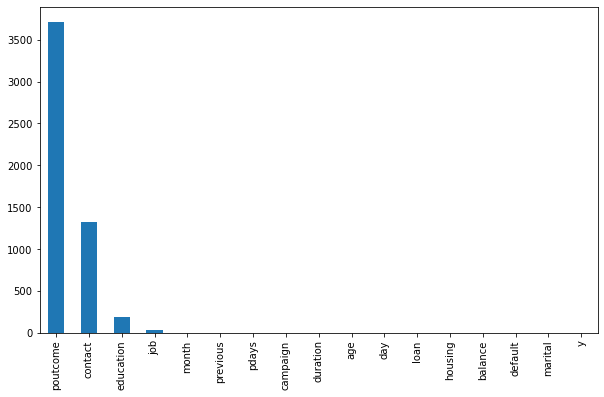

In [16]:
df.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

### Note about previous code
While it may appear insignificant to retain the column 'poutcome' given that we have only gathered data from 816 individuals out of a total of 4521, we have determined that it is still a sufficient sample size to warrant its inclusion in future analyses.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
#We are dropping pdays column since we might do not consider relevant to get to know the number of days that passed by after the client was last contacted from a previous campaign
df2=df.drop('pdays',axis=1)
#Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
df2=df2.drop('duration',axis=1)
#We are dropping day column since we might do not consider relevant to get to know the specific day clients were contacted 
df2=df2.drop('day',axis=1)

df2.rename(columns={'default': 'bank_debt',
                    'balance': 'avg_balance',
                    'housing': 'housing_loan',
                    'loan': 'personal_loan',
                    'campaign': 'n_contacts_done',
                    'poutcome':'results_prev_campains',
                    'y':'campaign_results',
                    'previous':'pre_n_contacts_done'}, inplace=True)

# Convert "success" and "failure" to binary (1 or 0) in "results_prev_campains"
# Convert "yes" and "no" to binary (1 or 0) in "bank_debt", "campaign_results","results_prev_campains","housing_loan","personal_loan"
df2['bank_debt'] = df2['bank_debt'].map({'yes': 1, 'no': 0})
df2['results_prev_campains'] = df2['results_prev_campains'].map({'success': 1, 'failure': 0,'other':0})
df2['campaign_results'] = df2['campaign_results'].map({'yes': 1, 'no': 0})
df2['housing_loan'] = df2['housing_loan'].map({'yes': 1, 'no': 0})
df2['personal_loan'] = df2['personal_loan'].map({'yes': 1, 'no': 0})

### Note about previous code
In order to simplify the analysis in the outcome_prev_campains column, we have decided to consider 'other' data values as 'failures', as we could consider 'other' as customers who did not successfully subscribe to a term deposit.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4521 non-null   int64  
 1   job                    4483 non-null   object 
 2   marital                4521 non-null   object 
 3   education              4334 non-null   object 
 4   bank_debt              4521 non-null   int64  
 5   avg_balance            4521 non-null   int64  
 6   housing_loan           4521 non-null   int64  
 7   personal_loan          4521 non-null   int64  
 8   contact                3197 non-null   object 
 9   month                  4521 non-null   object 
 10  n_contacts_done        4521 non-null   int64  
 11  pre_n_contacts_done    4521 non-null   int64  
 12  results_prev_campains  816 non-null    float64
 13  campaign_results       4521 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 494.6+ 

In [20]:
df2.head(10)

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,0,NaN,0
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,4,0.0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,1,0.0,0
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,0,NaN,0
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,0,NaN,0
5,35,management,single,tertiary,0,747,0,0,cellular,feb,2,3,0.0,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,may,1,2,0.0,0
7,39,technician,married,secondary,0,147,1,0,cellular,may,2,0,NaN,0
8,41,entrepreneur,married,tertiary,0,221,1,0,NaN,may,2,0,NaN,0
9,43,services,married,primary,0,-88,1,1,cellular,apr,1,2,0.0,0


2. Data Analysis

### Note
We have considered ignoring the 'Month' column for further analysis, as we feel that the data is too spread out over the year, with no particular month to consider.

In [21]:
value_counts=df2['month'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'month':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,month,Frequency,relative_frequencies
0,may,1398,0.309224
1,jul,706,0.156160
2,aug,633,0.140013
3,jun,531,0.117452
4,nov,389,0.086043
5,apr,293,0.064809
6,feb,222,0.049104
7,jan,148,0.032736
8,oct,80,0.017695
9,sep,52,0.011502


### Note
We may exclude the 'housing loan' column from further analysis, as individuals with a house loan may be less inclined to subscribe to a term deposit.

In [22]:
value_counts=df2['housing_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'housing_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,housing_loan,Frequency,relative_frequencies
0,1,2559,0.566025
1,0,1962,0.433975


### Note
We may exclude the 'personal loan' column from further analysis, as individuals with a personal loan may be less inclined to subscribe to a term deposit.

In [23]:
value_counts=df2['personal_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'personal_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,personal_loan,Frequency,relative_frequencies
0,0,3830,0.847158
1,1,691,0.152842


### Note
We may exclude the 'housing loan' column from further analysis, as the data appears to be irrelevant.

In [24]:
value_counts=df2['contact'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'contact':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,contact,Frequency,relative_frequencies
0,cellular,2896,0.640566
1,telephone,301,0.066578


### Note
While it may appear insignificant to retain the column 'poutcome' given that we have only gathered data from 816 individuals out of a total of 4521, we have determined that it is still a sufficient sample size to warrant its inclusion in future analyses.

In [25]:
value_counts=df2['results_prev_campains'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'results_prev_campains':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,results_prev_campains,Frequency,relative_frequencies
0,0.0,687,0.151958
1,1.0,129,0.028534


> 2.1 Campaign Success

In [30]:
campaing_results=df2.groupby('campaign_results',axis=0).count()
campaing_results

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains
campaign_results,,,,,,,,,,,,,
0,4000,3969,4000,3832,4000,4000,4000,4000,2737,4000,4000,4000,632
1,521,514,521,502,521,521,521,521,460,521,521,521,184


### Campaign Success

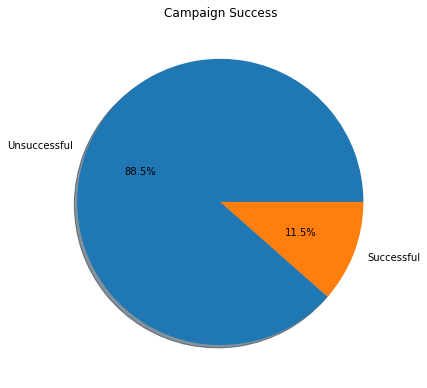

In [31]:
# Assuming you have the counts for 'campaign_results'
campaign_results_counts = df2['campaign_results'].value_counts()

# Define the labels for the pie chart
labels = ['Unsuccessful', 'Successful']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(campaign_results_counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Campaign Success')
plt.tight_layout()

plt.show()

In [32]:
value_counts=df2['campaign_results'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'campaign_results':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,campaign_results,Frequency,relative_frequencies
0,0,4000,0.88476
1,1,521,0.11524


> 2.2 Campaign Results by Group of Ages

In order to study how sucessful was the campaing by group of ages, we have decided to creat a new column grouping the column 'age' by group of age where young is population from 19 to 34, adult from 35 to 59 and elderly from 60 to 87.

In [33]:
max_age = df2['age'].max()
print("Maximum Age:", max_age)

Maximum Age: 87


In [34]:
min_age = df2['age'].min()
print("Minimum Age:", min_age)

Minimum Age: 19


In [35]:
age_distribution = [19, 35, 60, float('inf')]
age_labels = ['Young', 'Adult', 'Elderly']
df2['age_group'] = pd.cut(df2['age'], bins=age_distribution, labels=age_labels, right=False)

#In order to be able to work with the data we have decided to convert it in numerical data
#df2['age_group'] = df2['age_group'].map({'Young': 0, 'Adult': 1,'Elderly':2})

In [36]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,0,NaN,0,Young
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,4,0.0,0,Young
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,1,0.0,0,Adult
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,0,NaN,0,Young
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,0,NaN,0,Adult


In [37]:
ages_reached=df2.groupby('age_group',axis=0).count()
ages_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results
age_group,,,,,,,,,,,,,,
Young,1472,1468,1472,1437,1472,1472,1472,1472,1081,1472,1472,1472,257,1472
Adult,2875,2846,2875,2739,2875,2875,2875,2875,1954,2875,2875,2875,508,2875
Elderly,174,169,174,158,174,174,174,174,162,174,174,174,51,174


### Group of ages reached

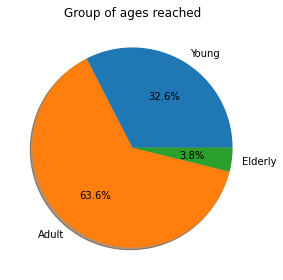

In [38]:
age_group=['Young','Adult','Elderly']
ages_reached['campaign_results'].plot(kind='pie', labels=age_group,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Group of ages reached')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Age Group

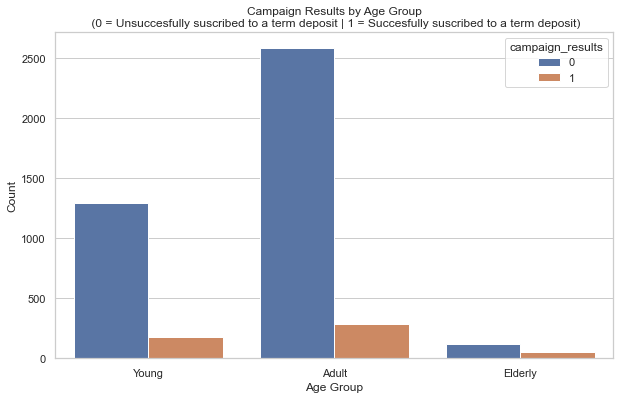

In [39]:
young_data = df2[df2['age_group'] == 'Young']
adult_data = df2[df2['age_group'] == 'Adult']
elderly_data = df2[df2['age_group'] == 'Elderly']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='age_group', hue='campaign_results')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Campaign Results by Age Group\n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')

plt.show()

In [40]:
value_counts=df2['age'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,34,231,0.051095
1,32,224,0.049547
2,31,199,0.044017
3,36,188,0.041584
4,33,186,0.041141
...,...,...,...
62,68,2,0.000442
63,87,1,0.000221
64,81,1,0.000221
65,86,1,0.000221


### Campaign Results for Adult Group of Age

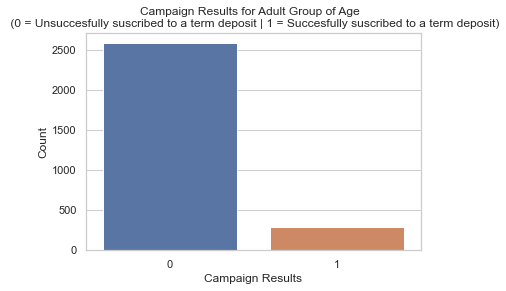

In [41]:
adult_data = df2[df2['age_group'] == 'Adult']

sns.countplot(data=adult_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Adult Group of Age  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [42]:
adult_data = df2[df2['age_group'] == 'Adult']
adult_data_counts = adult_data['campaign_results'].value_counts()

print(adult_data_counts)

0    2587
1     288
Name: campaign_results, dtype: int64


### Campaign Results for Young Group of Age

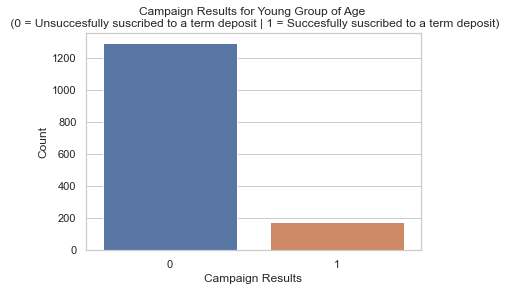

In [43]:
young_data = df2[df2['age_group'] == 'Young']

sns.countplot(data=young_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Young Group of Age \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [44]:
young_data = df2[df2['age_group'] == 'Young']
young_data_counts = young_data['campaign_results'].value_counts()

print(young_data_counts)

0    1294
1     178
Name: campaign_results, dtype: int64


> 2.2.1 Analysis of Relative Frequencies

In [45]:
value_counts=df2['age'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,34,231,0.051095
1,32,224,0.049547
2,31,199,0.044017
3,36,188,0.041584
4,33,186,0.041141
...,...,...,...
62,68,2,0.000442
63,87,1,0.000221
64,81,1,0.000221
65,86,1,0.000221


In [46]:
value_counts=df2['age_group'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,Adult,2875,0.635921
1,Young,1472,0.325592
2,Elderly,174,0.038487


> 2.3 Campaign Results by Marital Status

In [47]:
campaign_performance=df2.groupby('marital',axis=0).count()
campaign_performance

,age,job,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
marital,,,,,,,,,,,,,,
divorced,528,527,504,528,528,528,528,355,528,528,528,85,528,528
married,2797,2767,2680,2797,2797,2797,2797,1940,2797,2797,2797,492,2797,2797
single,1196,1189,1150,1196,1196,1196,1196,902,1196,1196,1196,239,1196,1196


### Marital status reached

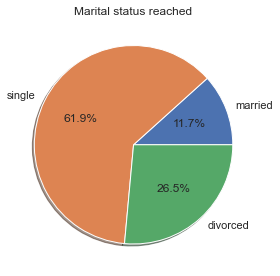

In [48]:
marital_status=['married','single','divorced']
campaign_performance['campaign_results'].plot(kind='pie', labels=marital_status,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Marital status reached')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Marital Status

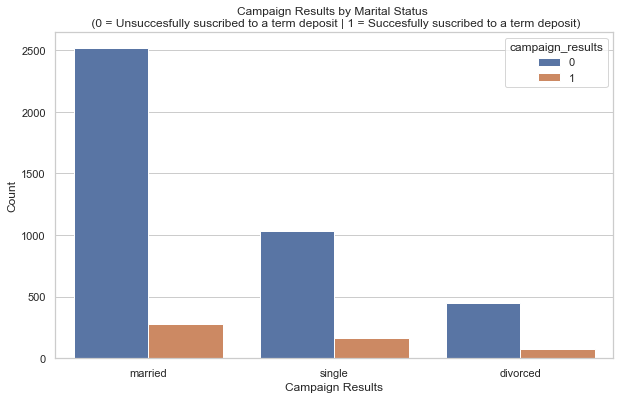

In [49]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='marital', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Marital Status \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')

plt.show()

### Campaign Results for Single Marital Status Group

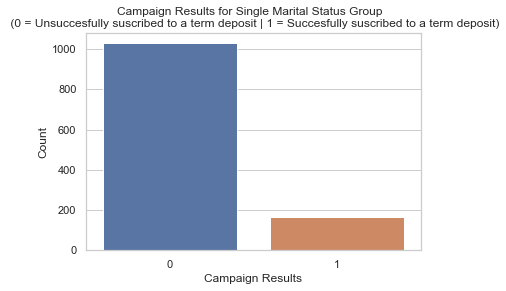

In [50]:
single_data = df2[df2['marital'] == 'single']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Single Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [51]:
single_data = df2[df2['marital'] == 'single']
single_data_counts = single_data['campaign_results'].value_counts()

print(single_data_counts)

0    1029
1     167
Name: campaign_results, dtype: int64


### Campaign Results for Married Group

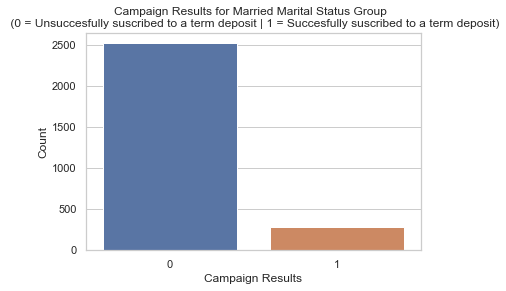

In [52]:
single_data = df2[df2['marital'] == 'married']

sns.countplot(data=single_data, x='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results for Married Marital Status Group  \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

In [53]:
married_data = df2[df2['marital'] == 'married']

married_data_counts = married_data['campaign_results'].value_counts()

print(married_data_counts)

0    2520
1     277
Name: campaign_results, dtype: int64


> 2.3.1 Analysis of Relative Frequencies

In [54]:
value_counts=df2['marital'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'marital':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,marital,Frequency,relative_frequencies
0,married,2797,0.618668
1,single,1196,0.264543
2,divorced,528,0.116788


> 2.4 Campaign Results by job

In [65]:
campaign_performance=df2.groupby('job',axis=0).count()
campaign_performance

,age,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
job,,,,,,,,,,,,,,
admin.,478,478,461,472,478,478,478,347,478,478,478,108,478,478
blue-collar,946,946,905,932,946,946,946,547,946,946,946,152,946,946
entrepreneur,168,168,157,161,168,168,168,118,168,168,168,23,168,168
housemaid,112,112,107,110,112,112,112,83,112,112,112,18,112,112
management,969,969,942,955,969,969,969,762,969,969,969,186,969,969
retired,230,230,216,227,230,230,230,187,230,230,230,49,230,230
self-employed,183,183,179,179,183,183,183,121,183,183,183,28,183,183
services,417,417,404,410,417,417,417,264,417,417,417,62,417,417
student,84,84,68,83,84,84,84,71,84,84,84,22,84,84


### Jobs overview

<Figure size 720x720 with 0 Axes>

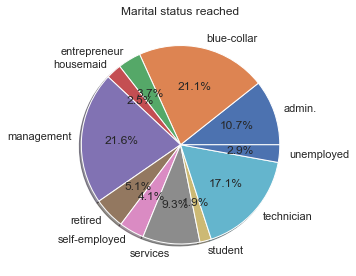

<Figure size 720x720 with 0 Axes>

In [66]:
jobs_overview=['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed']
campaign_performance['campaign_results'].plot(kind='pie', labels=jobs_overview,radius=1,autopct='%1.1f%%', shadow = True)

plt.title('Marital status reached')
plt.ylabel("")
plt.tight_layout()
plt.figure(figsize=(10, 10))

In [67]:
campaign_performance.reset_index(inplace=True)

In [68]:
campaign_performance.head()

,job,age,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,admin.,478,478,461,472,478,478,478,347,478,478,478,108,478,478
1,blue-collar,946,946,905,932,946,946,946,547,946,946,946,152,946,946
2,entrepreneur,168,168,157,161,168,168,168,118,168,168,168,23,168,168
3,housemaid,112,112,107,110,112,112,112,83,112,112,112,18,112,112
4,management,969,969,942,955,969,969,969,762,969,969,969,186,969,969


In [69]:
campaign_performance.columns=['job','age','marital','education','ank_debt','avg_balance','housing_loan','personal_loan','contact','month','n_contacts_done','pre_n_contacts_done','results_prev_campains','campaign_results','age_group']

In [70]:
campaign_performance

,job,age,marital,education,ank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
0,admin.,478,478,461,472,478,478,478,347,478,478,478,108,478,478
1,blue-collar,946,946,905,932,946,946,946,547,946,946,946,152,946,946
2,entrepreneur,168,168,157,161,168,168,168,118,168,168,168,23,168,168
3,housemaid,112,112,107,110,112,112,112,83,112,112,112,18,112,112
4,management,969,969,942,955,969,969,969,762,969,969,969,186,969,969
5,retired,230,230,216,227,230,230,230,187,230,230,230,49,230,230
6,self-employed,183,183,179,179,183,183,183,121,183,183,183,28,183,183
7,services,417,417,404,410,417,417,417,264,417,417,417,62,417,417
8,student,84,84,68,83,84,84,84,71,84,84,84,22,84,84
9,technician,768,768,746,753,768,768,768,573,768,768,768,141,768,768


### Customers Job 

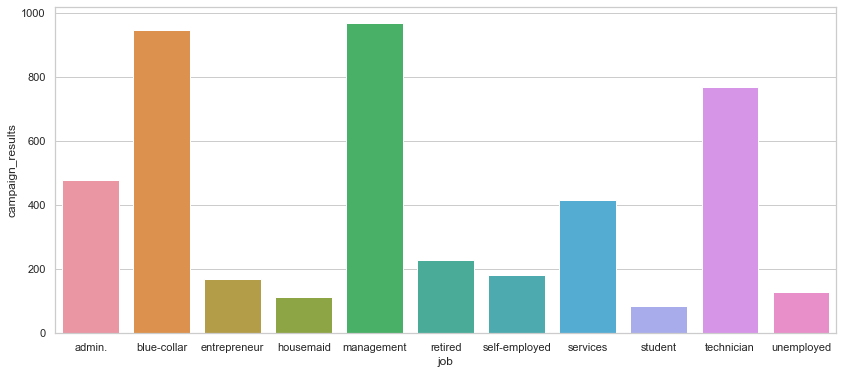

In [71]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='job',y='campaign_results',data=campaign_performance)

### Campaign Results by Job

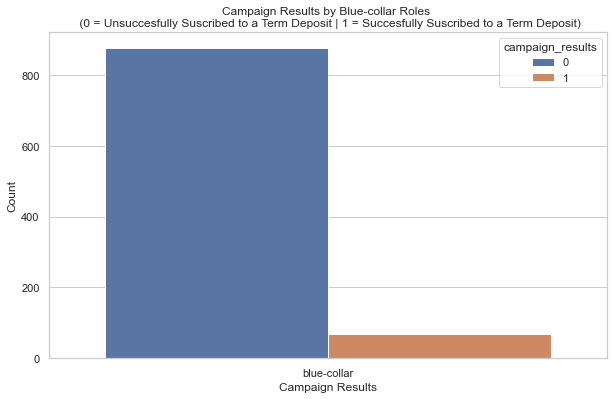

In [72]:
blue_collar_data = df2[df2['job'] == 'blue-collar']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=blue_collar_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Blue-collar Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

### Campaign Results by Management Roles

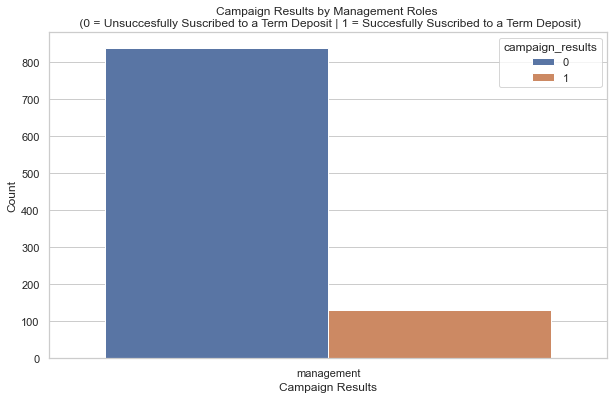

In [73]:
mangement_data = df2[df2['job'] == 'management']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=mangement_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Management Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [74]:
mangement_data = df2[df2['job'] == 'management']

mangement_data_counts = mangement_data['campaign_results'].value_counts()

print(mangement_data_counts)

0    838
1    131
Name: campaign_results, dtype: int64


### Campaign Results by Technician Roles

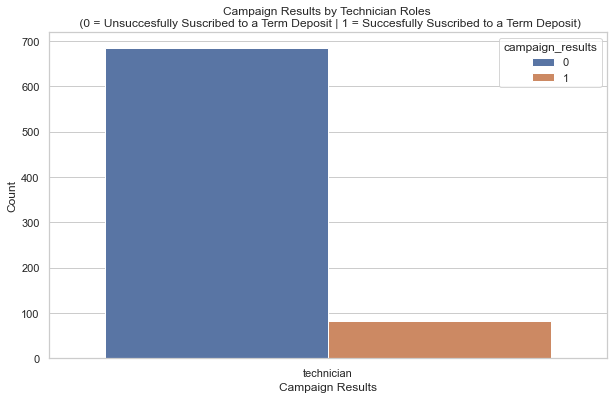

In [75]:
technician_data = df2[df2['job'] == 'technician']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=technician_data, x='job', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Technician Roles \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [76]:
technician_data = df2[df2['job'] == 'technician']

technician_data_counts = technician_data['campaign_results'].value_counts()

print(technician_data_counts)

0    685
1     83
Name: campaign_results, dtype: int64


> 2.4.1 Analysis of Relative Frequencies

In [77]:
value_counts=df2['job'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'job':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,job,Frequency,relative_frequencies
0,management,969,0.214333
1,blue-collar,946,0.209246
2,technician,768,0.169874
3,admin.,478,0.105729
4,services,417,0.092236
5,retired,230,0.050874
6,self-employed,183,0.040478
7,entrepreneur,168,0.037160
8,unemployed,128,0.028312
9,housemaid,112,0.024773


> 2.5 Campaign Results by Education

In [78]:
campaign_performance=df2.groupby('education',axis=0).count()
campaign_performance

,age,job,marital,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
education,,,,,,,,,,,,,,
primary,678,671,678,668,678,678,678,418,678,678,678,98,678,678
secondary,2306,2298,2306,2260,2306,2306,2306,1587,2306,2306,2306,415,2306,2306
tertiary,1350,1342,1350,1333,1350,1350,1350,1078,1350,1350,1350,266,1350,1350


### Education achieved Analysis

<Figure size 720x720 with 0 Axes>

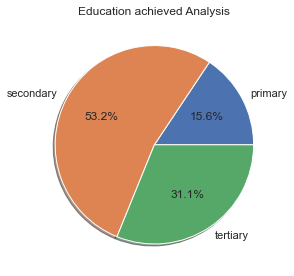

<Figure size 720x720 with 0 Axes>

In [79]:
educatiom_overview=['primary','secondary','tertiary']
campaign_performance['campaign_results'].plot(kind='pie', labels=educatiom_overview,radius=1,autopct='%1.1f%%', shadow = True)

plt.title('Education achieved Analysis')
plt.ylabel("")
plt.tight_layout()
plt.figure(figsize=(10, 10))

### Campaign Results by Education Achieved

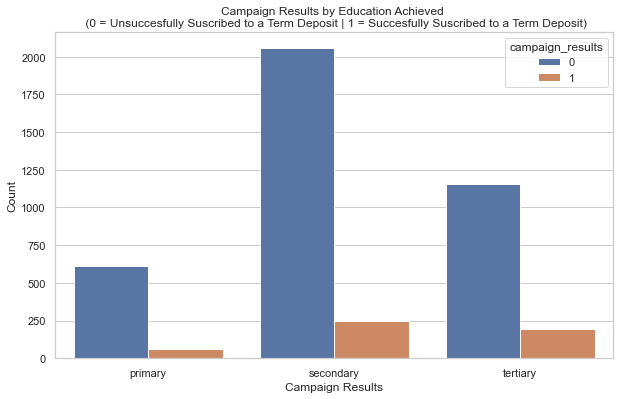

In [80]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='education', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Education Achieved \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

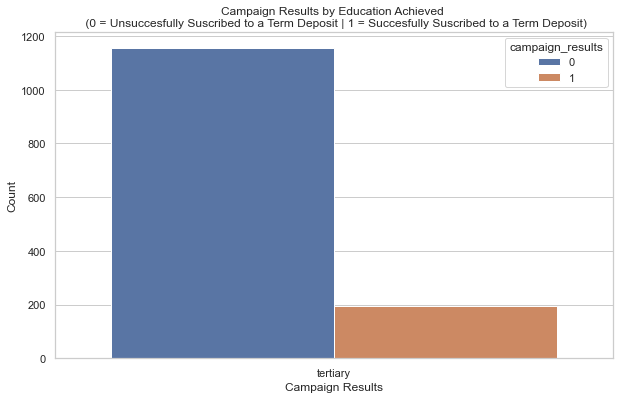

In [81]:
primary_education_data = df2[df2['education'] == 'primary']
secondary_education_data = df2[df2['education'] == 'secondary']
tertiary_education_data = df2[df2['education'] == 'tertiary']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=tertiary_education_data, x='education', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Education Achieved \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [82]:
tertiary_education_data = df2[df2['education'] == 'tertiary']

tertiary_education_counts = tertiary_education_data['campaign_results'].value_counts()

print(tertiary_education_counts)

0    1157
1     193
Name: campaign_results, dtype: int64


> 2.5.1 Analysis of Relative Frequencies

In [83]:
value_counts=df2['education'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'education':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,education,Frequency,relative_frequencies
0,secondary,2306,0.510064
1,tertiary,1350,0.298607
2,primary,678,0.149967


> 2.6 Campaign Results by Average Balance in the Bank

In [84]:
max_balance = df2['avg_balance'].max()
print("Maximum Balance:", max_balance)

Maximum Balance: 71188


In [85]:
min_balance = df2['avg_balance'].min()
print("Minimum Balance:", min_balance)

Minimum Balance: -3313


In [86]:
mean_balance = df2['avg_balance'].mean()
print("Mean Balance:", mean_balance)

Mean Balance: 1422.6578190665782


In order to study how sucessful was the campaing by the average balance in the bank account, we have decided to creat a new column grouping the column 'avg_balance' by group of balance where low is population from -3333 to 1421, standard from 1422 to 4000 and high from 4001 to 71188.

In [87]:
balance_distribution = [-3333, 1422, 4000, float('inf')]
balance_labels = ['low', 'standard', 'high']
df2['balance_clasification'] = pd.cut(df2['avg_balance'], bins=balance_distribution, labels=balance_labels, right=False)

In [88]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,0,NaN,0,Young,standard
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,4,0.0,0,Young,high
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,1,0.0,0,Adult,low
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,0,NaN,0,Young,standard
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,0,NaN,0,Adult,low


In [89]:
balance_reached=df2.groupby('balance_clasification',axis=0).count()
balance_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group
balance_clasification,,,,,,,,,,,,,,,
low,3359,3334,3359,3231,3283,3359,3359,3359,2354,3359,3359,3359,574,3359,3359
standard,729,720,729,695,729,729,729,729,527,729,729,729,150,729,729
high,433,429,433,408,433,433,433,433,316,433,433,433,92,433,433


### Group of People Reached by Average Balance in their Bank Account

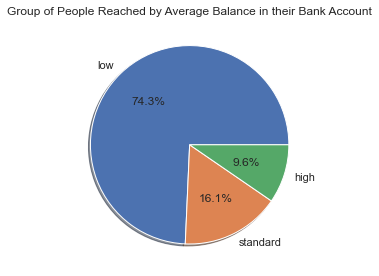

In [90]:
balance_group=['low','standard','high']
balance_reached['campaign_results'].plot(kind='pie', labels=balance_group,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Group of People Reached by Average Balance in their Bank Account')
plt.ylabel("")
plt.tight_layout()

### Campaign Results by Age Group

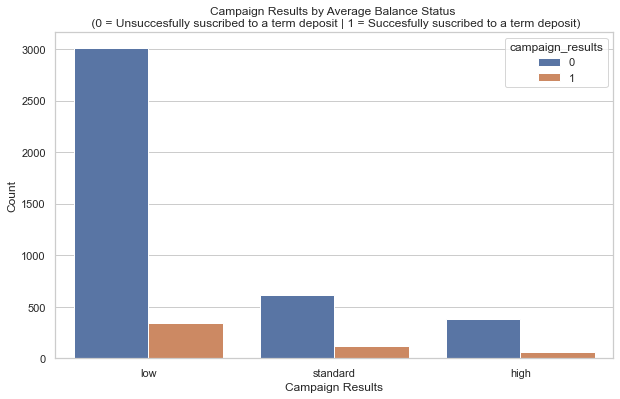

In [91]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=df2, x='balance_clasification', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Average Balance Status \n (0 = Unsuccesfully suscribed to a term deposit | 1 = Succesfully suscribed to a term deposit)')
plt.show()

### Campaign Results by Customer by Average Balance Status

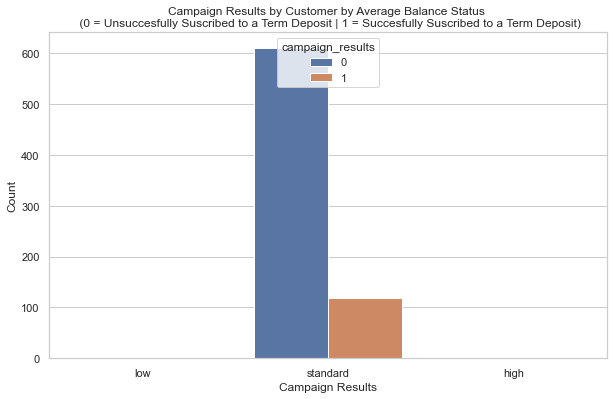

In [92]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(data=standard_bank_data , x='balance_clasification', hue='campaign_results')

plt.xlabel('Campaign Results')
plt.ylabel('Count')
plt.title('Campaign Results by Customer by Average Balance Status \n (0 = Unsuccesfully Suscribed to a Term Deposit | 1 = Succesfully Suscribed to a Term Deposit)')

plt.show()

In [93]:
standard_bank_data = df2[df2['balance_clasification'] == 'standard']

campaign_results_counts = standard_bank_data['campaign_results'].value_counts()

print(campaign_results_counts)

0    611
1    118
Name: campaign_results, dtype: int64


In [94]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,0,NaN,0,Young,standard
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,4,0.0,0,Young,high
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,1,0.0,0,Adult,low
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,0,NaN,0,Young,standard
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,0,NaN,0,Adult,low


> 2.6.1 Analysis of Relative Frequencies

In [95]:
value_counts=df2['avg_balance'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'balance_clasification':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,balance_clasification,Frequency,relative_frequencies
0,0,357,0.078965
1,2,24,0.005309
2,1,15,0.003318
3,4,13,0.002875
4,5,11,0.002433
...,...,...,...
2348,539,1,0.000221
2349,1041,1,0.000221
2350,464,1,0.000221
2351,7702,1,0.000221


In [96]:
value_counts=df2['balance_clasification'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'balance_clasification':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,balance_clasification,Frequency,relative_frequencies
0,low,3359,0.742977
1,standard,729,0.161248
2,high,433,0.095775


> 2.8 Summary Analysis

### Numerical Features

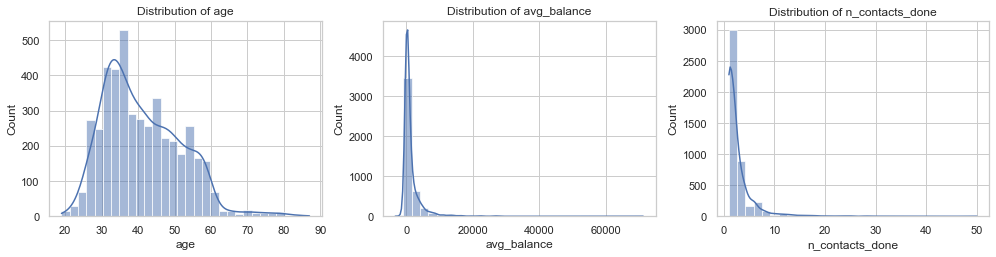

In [97]:
# Set the style and size for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# List of numerical features
numerical_features = ['age', 'avg_balance','n_contacts_done']

# Plot the distribution of numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Categorical Features

### Note
We have decided not to include data on customers, whether or not they have bank loans, as we consider them to be high-risk targets.

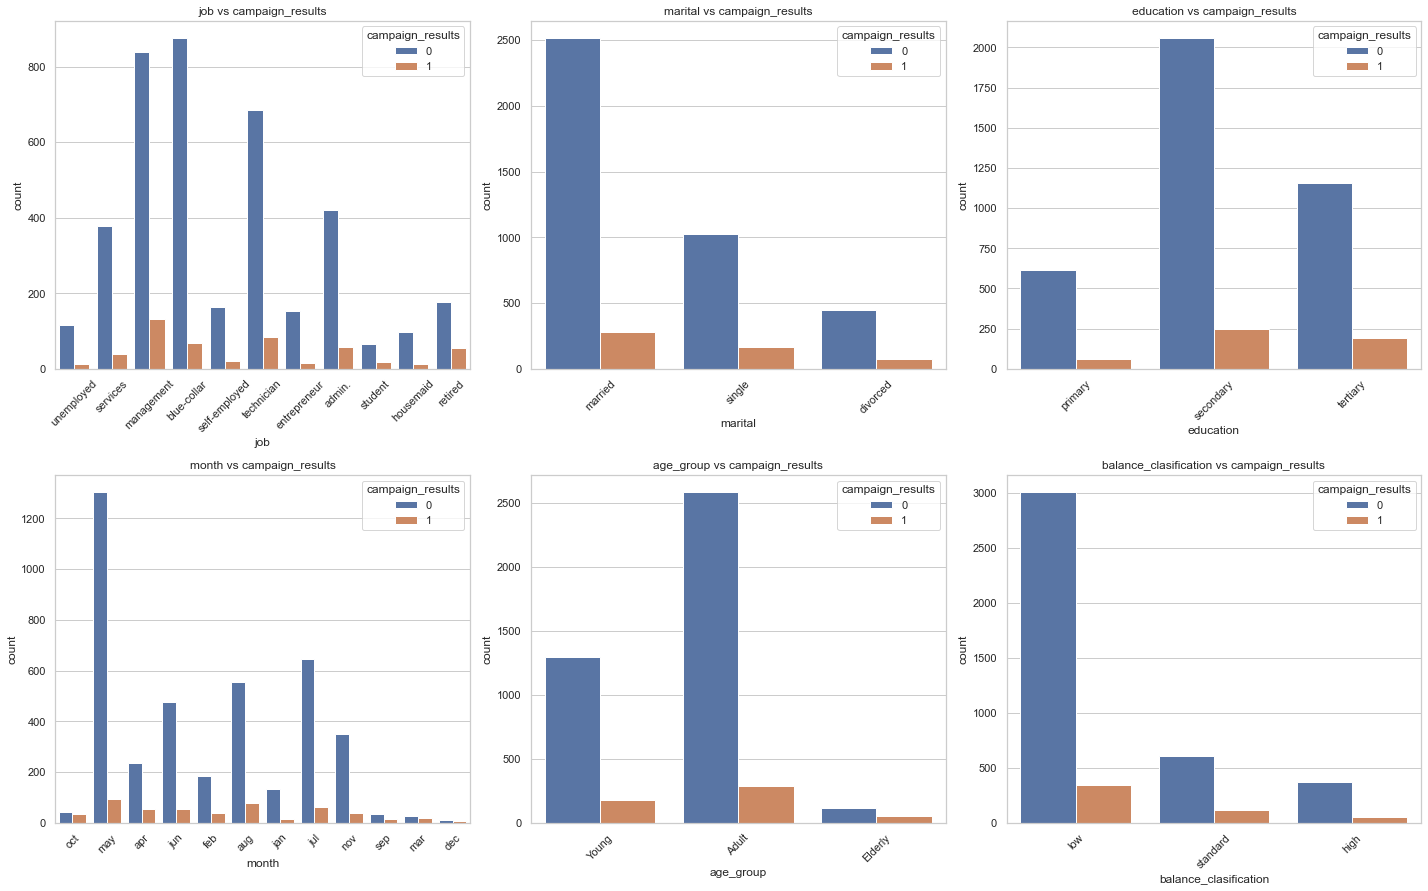

In [101]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'month','age_group','balance_clasification']

# Set the size for the plots
plt.figure(figsize=(20, 18))

# Plot the distribution of categorical features in relation to the target variable 'deposit'
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df2, x=feature, hue='campaign_results')
    plt.title(f'{feature} vs campaign_results')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [104]:
df2

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pre_n_contacts_done,results_prev_campains,campaign_results,age_group,balance_clasification
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,0,NaN,0,Young,standard
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,4,0.0,0,Young,high
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,1,0.0,0,Adult,low
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,0,NaN,0,Young,standard
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,0,NaN,0,Adult,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,jul,5,0,NaN,0,Young,low
4517,57,self-employed,married,tertiary,NaN,-3313,1,1,NaN,may,1,0,NaN,0,Adult,low
4518,57,technician,married,secondary,0,295,0,0,cellular,aug,11,0,NaN,0,Adult,low
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,feb,4,3,0.0,0,Young,low


### References

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/222/bank+marketing [Acceesed 05 Nov 2023].

pandas.pydata.org. (n.d.). pandas.cut — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.cut.html [Acceesed 05 Nov 2023].